# Deep Learning - LSTM & RNN for prediction 

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [5]:
# loading dataset
data = pd.read_csv('USDINRX.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-01,45.709000,45.728001,45.615002,45.709999,45.709999,0.0
1,2003-12-02,45.709000,45.719002,45.560001,45.629002,45.629002,0.0
2,2003-12-03,45.632000,45.655998,45.474998,45.549999,45.549999,0.0
3,2003-12-04,45.548000,45.612999,45.519001,45.548000,45.548000,0.0
4,2003-12-05,45.549999,45.566002,45.449001,45.449001,45.449001,0.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4650 entries, 0 to 4649
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4650 non-null   object 
 1   Open       4598 non-null   float64
 2   High       4598 non-null   float64
 3   Low        4598 non-null   float64
 4   Close      4598 non-null   float64
 5   Adj Close  4598 non-null   float64
 6   Volume     4598 non-null   float64
dtypes: float64(6), object(1)
memory usage: 254.4+ KB


In [7]:
data.isnull().sum()

Date          0
Open         52
High         52
Low          52
Close        52
Adj Close    52
Volume       52
dtype: int64

In [8]:
data = data.dropna()

In [9]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
data = data.astype({'Date': 'datetime64[ns]'})

plotting rupee price

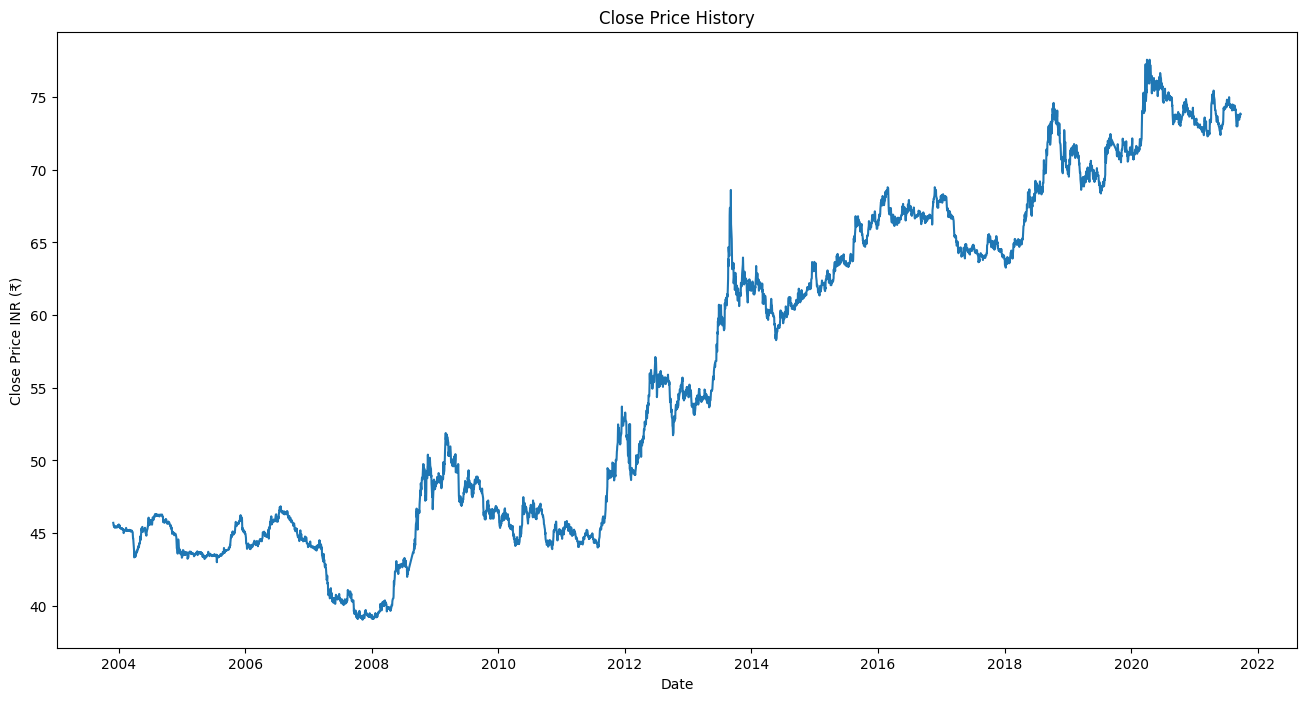

In [11]:
date = data['Date']
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(data['Date'],data['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price INR (₹)')
plt.show()


In [12]:
df = data.filter(['Close'])
dataset = df.values
train_data_len = math.ceil(len(dataset)*.8)
train_data_len

3679

In [13]:
#Transform features by scaling each feature to a given range

scaler = MinMaxScaler(feature_range=(0,1))
scaler_data = scaler.fit_transform(dataset)
scaler_data

array([[0.17300456],
       [0.17090211],
       [0.16885141],
       ...,
       [0.90195204],
       [0.90408569],
       [0.90317965]])

In [14]:
train_data = scaler_data[0:train_data_len , :]

In [15]:
x_train = []
y_train = []

for i in range(60 , len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [16]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [17]:
#loading tensorflow library
from keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

Building Model

In [18]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50))
model.add(Dense(1))

In [19]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [20]:
history=model.fit(x_train, y_train, epochs=10, batch_size=1)

Epoch 1/10
3619/3619 [==============================] - 401s 99ms/step - loss: 5.6521e-04
Epoch 2/10
3619/3619 [==============================] - 350s 97ms/step - loss: 2.3192e-04
Epoch 3/10
3619/3619 [==============================] - 268s 74ms/step - loss: 1.5965e-04
Epoch 4/10
3619/3619 [==============================] - 326s 90ms/step - loss: 1.3703e-04
Epoch 5/10
3619/3619 [==============================] - 336s 93ms/step - loss: 1.2653e-04
Epoch 6/10
3619/3619 [==============================] - 370s 102ms/step - loss: 1.1189e-04
Epoch 7/10
3619/3619 [==============================] - 338s 93ms/step - loss: 1.0072e-04
Epoch 8/10
3619/3619 [==============================] - 333s 92ms/step - loss: 1.0862e-04
Epoch 9/10
3619/3619 [==============================] - 343s 95ms/step - loss: 9.6753e-05
Epoch 10/10
3619/3619 [==============================] - 282s 78ms/step - loss: 9.3641e-05


In [21]:
test_data = scaler_data[train_data_len - 60:, :]
x_test = []
y_test = dataset[train_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

Making Prediction

In [22]:
pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)

29/29 [==============================] - 7s 35ms/step


Plotting the prediction

C:\Users\pater\AppData\Local\Temp\ipykernel_4760\1445531564.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = pred


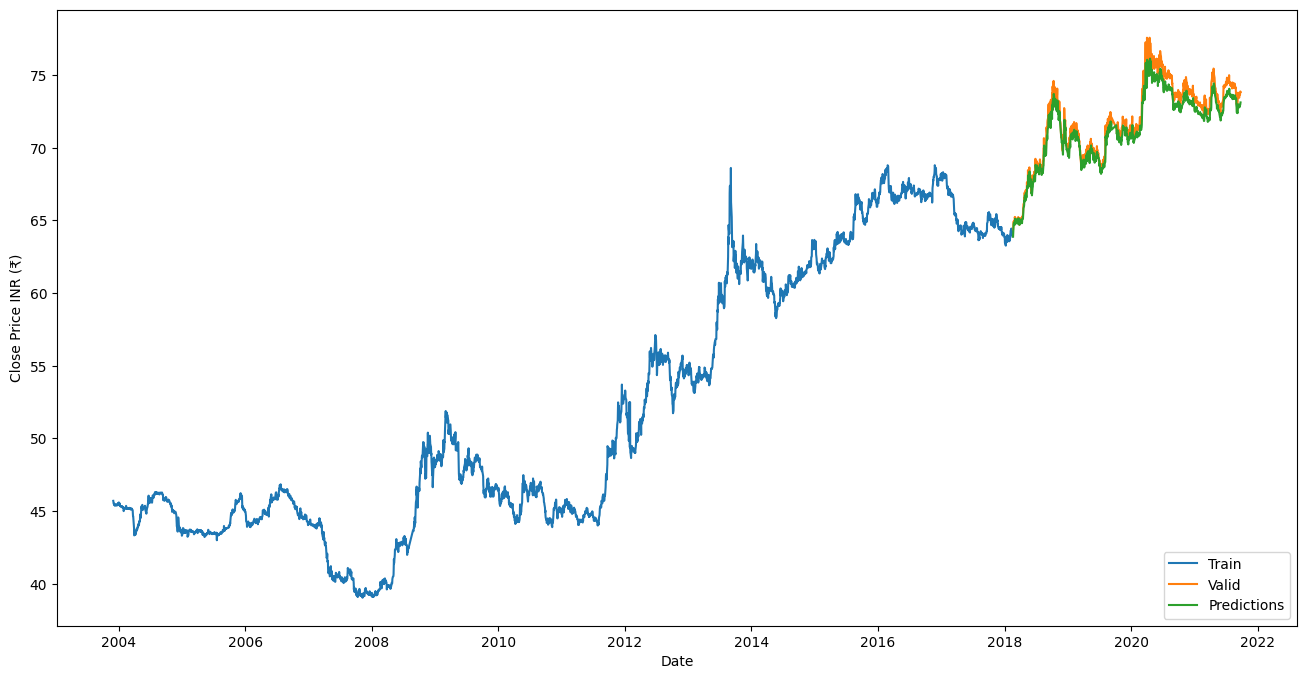

In [23]:
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions'] = pred
plt.figure(figsize=(16,8))
plt.xlabel('Date')
plt.ylabel('Close Price INR (₹)')
plt.plot(train['Date'],train['Close'])
plt.plot(valid['Date'],valid[['Close','Predictions']])
plt.legend(['Train','Valid','Predictions'], loc='lower right')
plt.show()

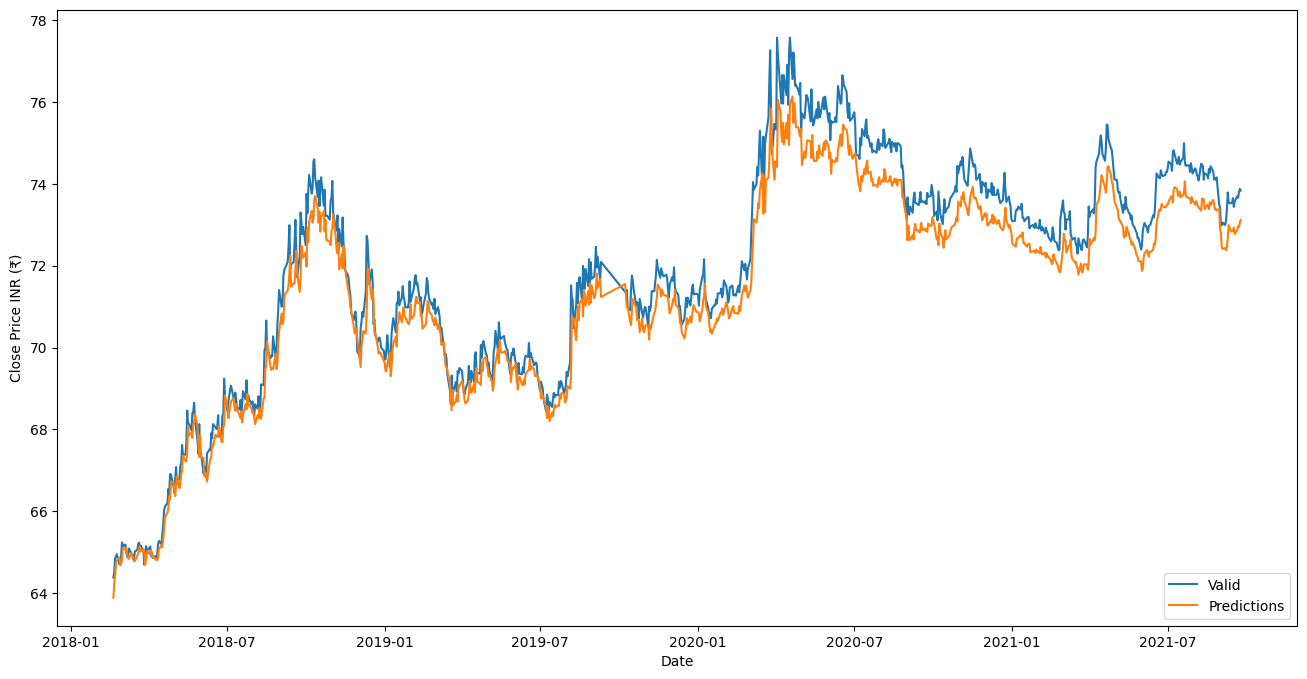

In [24]:
plt.figure(figsize=(16,8))
plt.plot(valid['Date'],valid[['Close','Predictions']])
plt.legend(['Valid','Predictions'], loc='lower right')
plt.xlabel('Date')
plt.ylabel('Close Price INR (₹)')
plt.show()